# Assignment 1
## Cifar-10 classification with Fully Connected Network



First we import the necessary libraries.

In [17]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

Tensorflow is used for the backend of the project.

In [18]:
from keras import backend as K
print(K.backend())

tensorflow


When creating the model, we use an input step with 32x32 pixels, resulting in 784 units for the input layer.

Next we have a dense layer with 256 units, corresponding to the colour value of the given pixels from 0 to 255.

We added a layer of 100 units

In [19]:
# Create the model
# CIFAR-10 images are 32x32 pixels with 3 color channels (RGB)
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Flatten()(inputs) # Flatten the input for the dense layers
# x = layers.Dense(768, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,258 (3.01 MB)

 Trainable params: 789,258 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

**Important:** Make sure to run the first code cell that imports `keras` and other libraries before proceeding with the rest of the notebook.

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [21]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [22]:
epochs = 10

history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3070 - loss: 1.9421 - val_accuracy: 0.3473 - val_loss: 1.8351
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3723 - loss: 1.7679 - val_accuracy: 0.3793 - val_loss: 1.7474
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3954 - loss: 1.6935 - val_accuracy: 0.4122 - val_loss: 1.6821
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4158 - loss: 1.6441 - val_accuracy: 0.4181 - val_loss: 1.6467
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4245 - loss: 1.6154 - val_accuracy: 0.4280 - val_loss: 1.6291
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4359 - loss: 1.5912 - val_accuracy: 0.4275 - val_loss: 1.6197
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4396 - loss: 1.5740 - val_accuracy: 0.4269 - val_loss: 1.6269
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4451 - loss: 1.5585 - val_accuracy: 0.

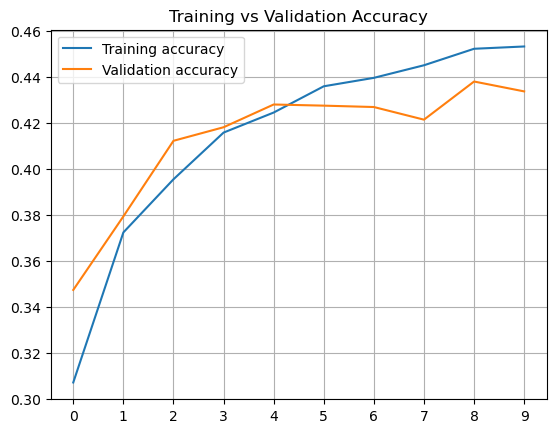

In [23]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

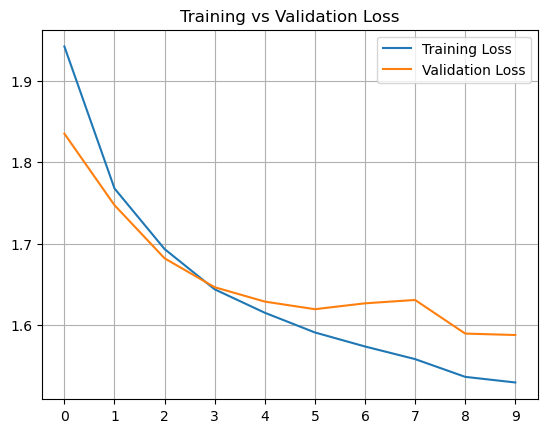

In [24]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1,len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()


In [25]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - 3ms/step - accuracy: 0.4401 - loss: 1.5642
Test loss: 1.5641744136810303
Test accuracy: 0.4401000142097473


The Cifar-10 dataset contains images from 10 categories, corresponding to the target class numbers:<br>
0: airplane					<br>
1: automobile						<br>
2: bird										<br>
3: cat										<br>
4: deer										<br>
5: dog										<br>
6: frog										<br>
7: horse										<br>
8: ship										<br>
9: truck<br>

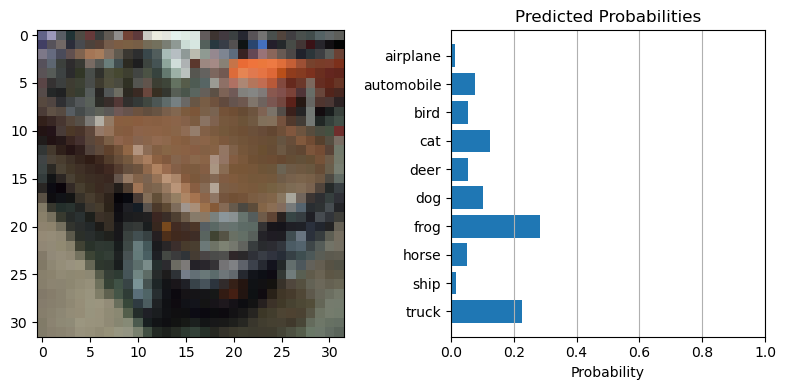

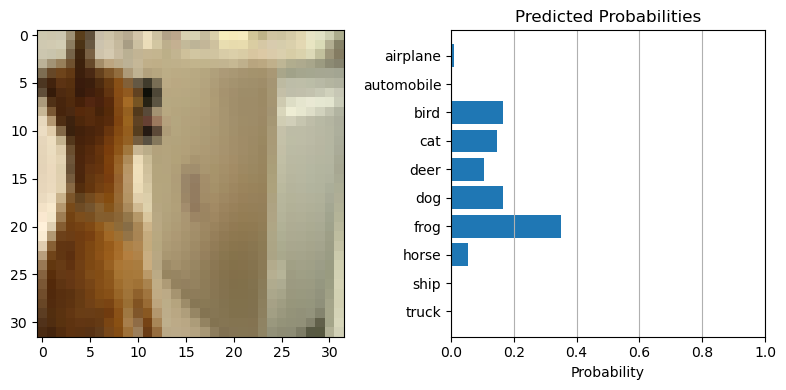

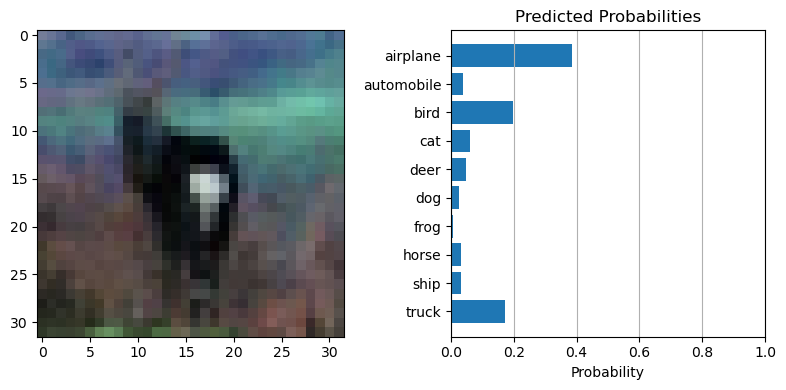

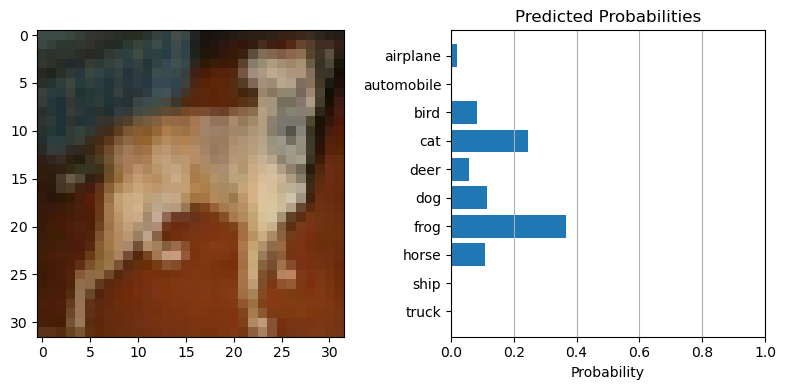

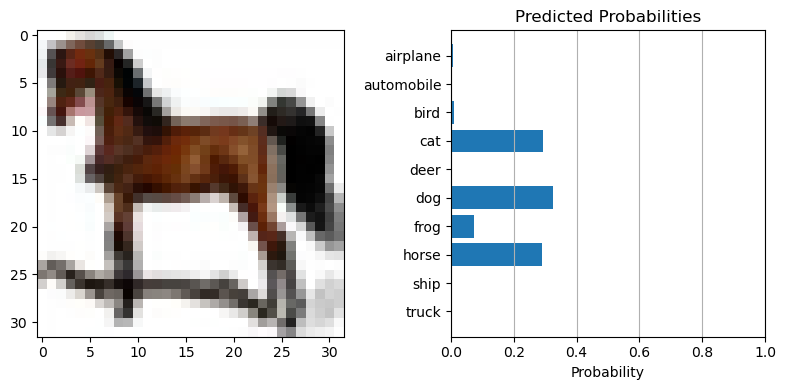

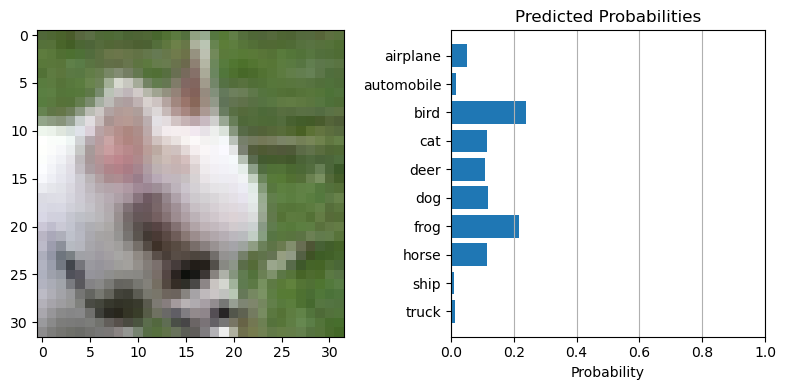

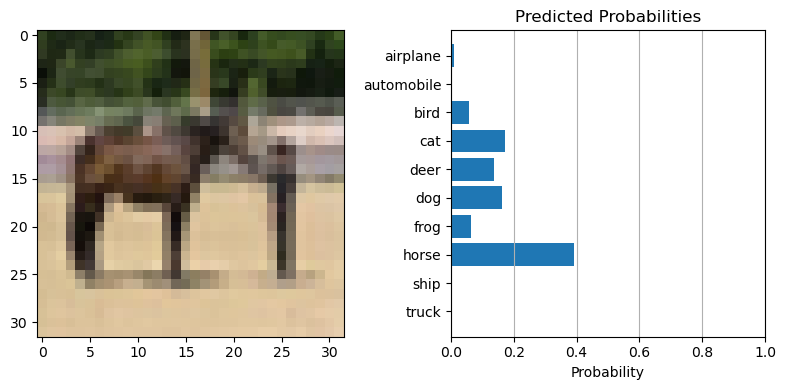

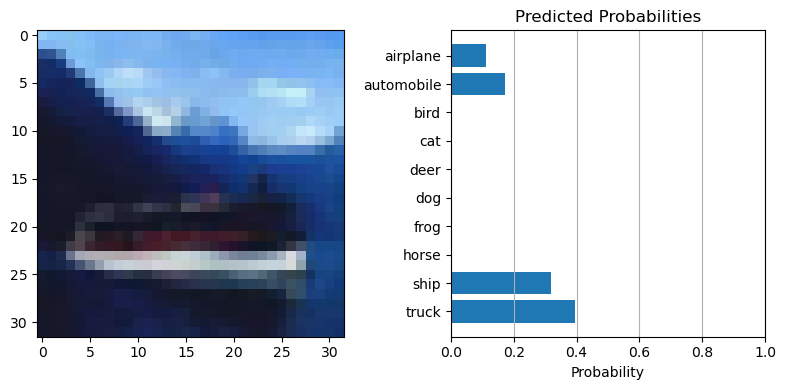

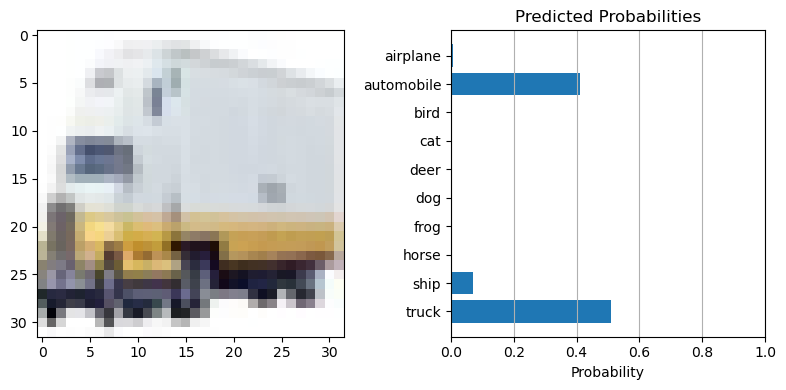

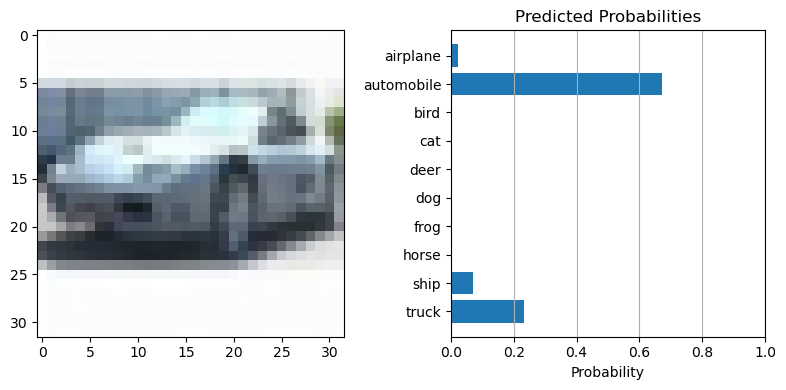

In [26]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4)) # Increased figure height for better horizontal plot
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((32, 32, 3)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.barh(ind, y[start+k].numpy().flatten()) # Use barh for horizontal bars
    plt.yticks(ind, targets) # Use yticks for vertical labels
    plt.gca().invert_yaxis() # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability") # Label the x-axis as probability
    plt.title("Predicted Probabilities") # Add a title to the bar plot
    plt.xlim(0, 1) # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x') # Add grid lines for the x-axis
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

## Modifying the model

Here we start to tinker with the parameters of the model, testing adding layers, optimizers and callbacks.

In [27]:
# Create the model
# CIFAR-10 images are 32x32 pixels with 3 color channels (RGB)
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Flatten()(inputs) # Flatten the input for the dense layers
x = layers.Dense(1024, use_bias=False, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(512, use_bias=False, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(256, use_bias=False, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(64, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

model.summary()

Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     3,145,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,825,546 (14.59 MB)

 Trainable params: 3,821,834 (14.58 MB)

 Non-trainable params: 3,712 (14.50 KB)

In [28]:
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# validation and train split for datamanipulation
x_train_part, x_val, y_train_part, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [46]:
from keras.src.callbacks import ReduceLROnPlateau
from keras.src.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# this rotates and skew images so in learning phase, model doesnt see  exact same picture again
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

epochs = 100
batch_size = 128
# this decreases automatically learning rate towards the end
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=1e-6, verbose=1)

optimizer = AdamW(learning_rate=0.0002, weight_decay=1e-5)
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto', restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(
    datagen.flow(x_train_part, y_train_part, batch_size=batch_size),
    validation_data=(x_val, y_val),
    epochs=epochs,
    callbacks=[earlystop,reduce_lr]
)

Epoch 1/100


I0000 00:00:1761993571.579254   96769 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_20', 376 bytes spill stores, 356 bytes spill loads

I0000 00:00:1761993571.668002   96768 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_36', 336 bytes spill stores, 336 bytes spill loads

I0000 00:00:1761993571.733890   96746 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_22', 368 bytes spill stores, 352 bytes spill loads



304/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3248 - loss: 2.2485

I0000 00:00:1761993575.203588   96982 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_20', 376 bytes spill stores, 356 bytes spill loads

I0000 00:00:1761993575.321931   96978 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_36', 336 bytes spill stores, 336 bytes spill loads

I0000 00:00:1761993575.335726   96966 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_22', 304 bytes spill stores, 304 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3264 - loss: 2.2428

I0000 00:00:1761993577.637042   97194 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_12', 344 bytes spill stores, 344 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.3810 - loss: 2.0489 - val_accuracy: 0.3706 - val_loss: 2.0137 - learning_rate: 2.0000e-04
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4696 - loss: 1.7608 - val_accuracy: 0.3797 - val_loss: 1.9666 - learning_rate: 2.0000e-04
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5059 - loss: 1.6478 - val_accuracy: 0.3992 - val_loss: 1.9482 - learning_rate: 2.0000e-04
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5372 - loss: 1.5604 - val_accuracy: 0.3949 - val_loss: 1.9413 - learning_rate: 2.0000e-04
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5613 - loss: 1.4937 - val_accuracy: 0.4097 - val_loss: 1.9062 - learning_rate: 2.0000e-04
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5857 - loss: 1.4269 - val_accuracy: 0.4531 - val_loss: 1.7692 - learning_rate: 2.0000e-04
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.60

KeyboardInterrupt: 

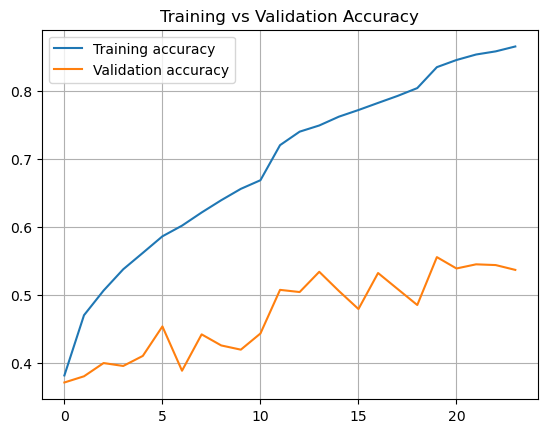

In [30]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

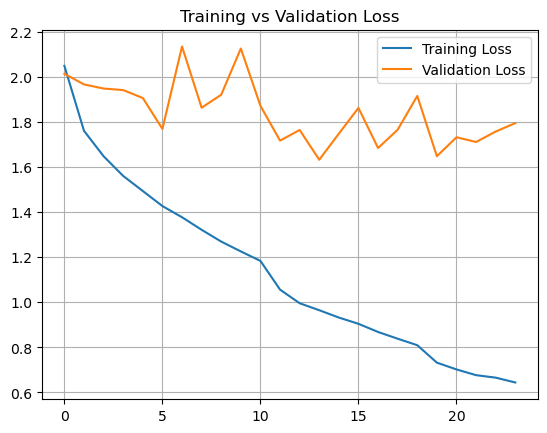

In [31]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1,len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

In [32]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

I0000 00:00:1761993598.464944  100641 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_10', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1761993598.621083  100644 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_10', 448 bytes spill stores, 428 bytes spill loads



313/313 - 1s - 5ms/step - accuracy: 0.5313 - loss: 1.6463
Test loss: 1.646329641342163
Test accuracy: 0.5313000082969666
Final training accuracy: 0.8651250004768372
Final training loss: 0.6443315148353577
Final validation accuracy: 0.536300003528595
Final validation loss: 1.7949423789978027


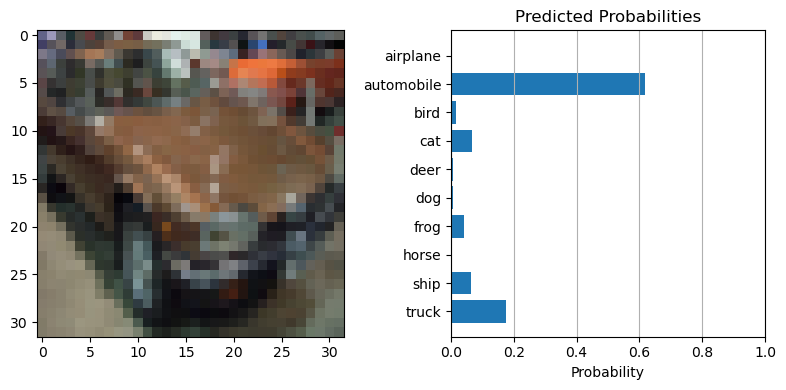

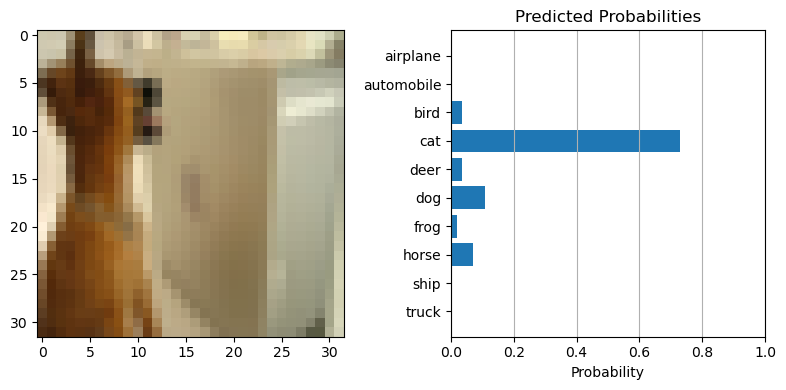

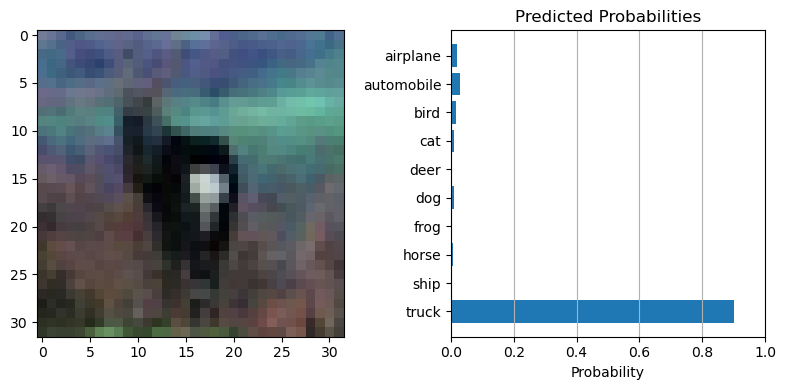

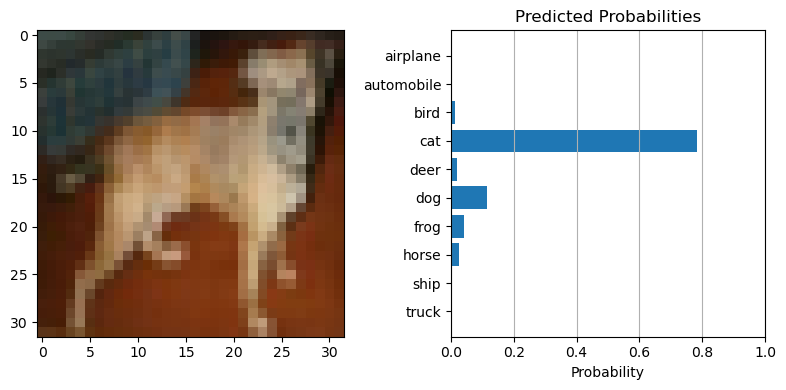

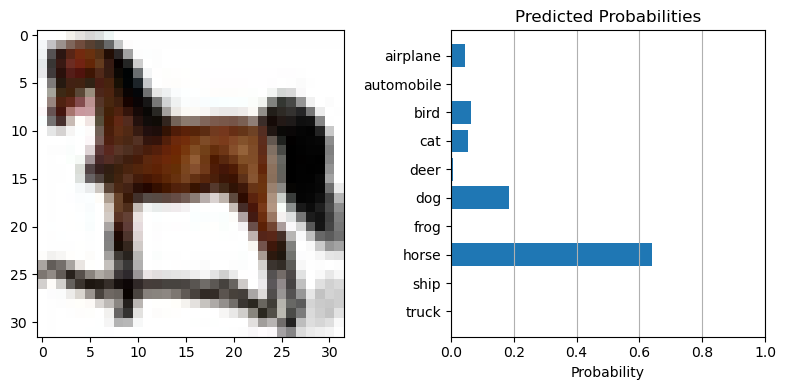

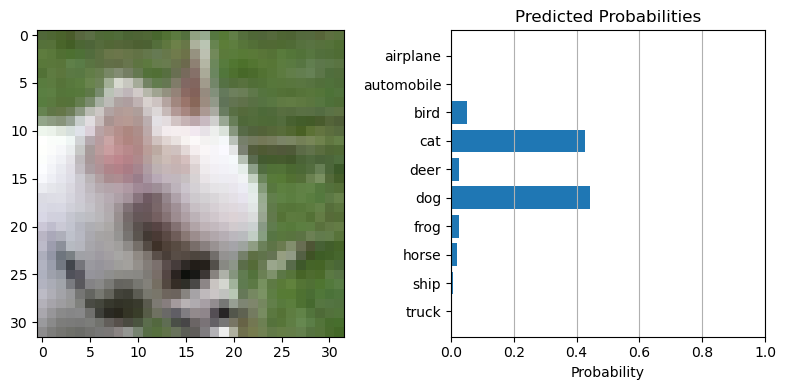

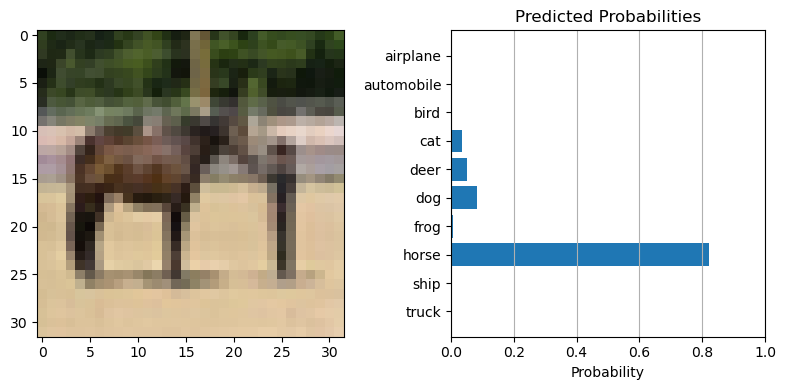

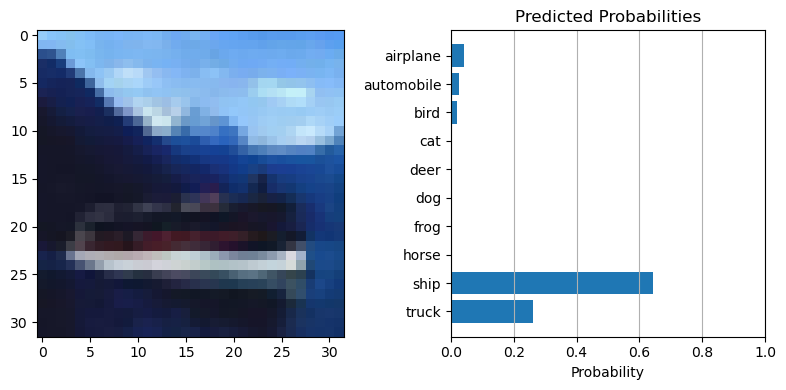

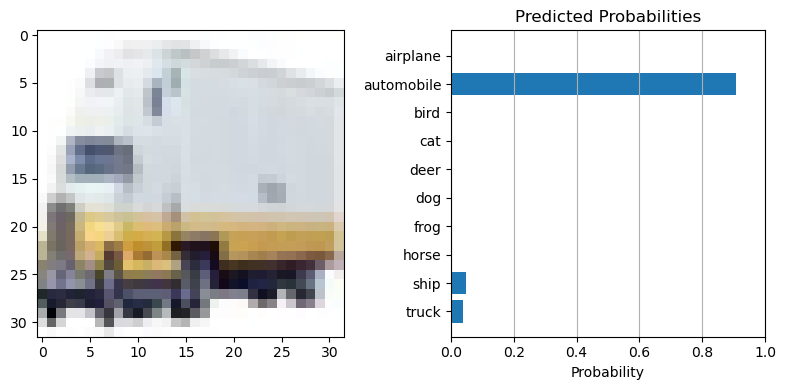

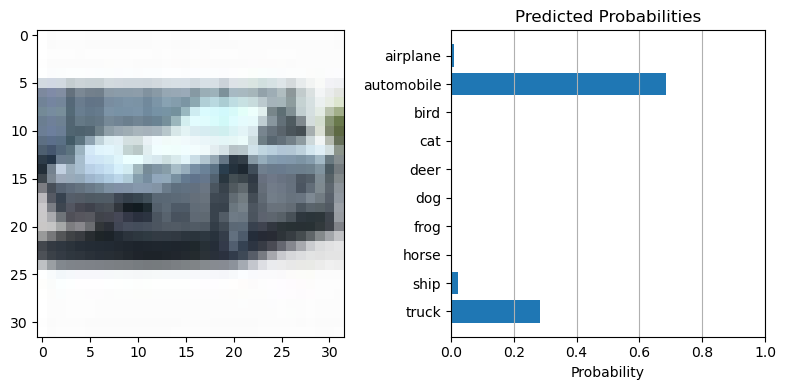

In [33]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4)) # Increased figure height for better horizontal plot
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((32, 32, 3)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.barh(ind, y[start+k].numpy().flatten()) # Use barh for horizontal bars
    plt.yticks(ind, targets) # Use yticks for vertical labels
    plt.gca().invert_yaxis() # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability") # Label the x-axis as probability
    plt.title("Predicted Probabilities") # Add a title to the bar plot
    plt.xlim(0, 1) # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x') # Add grid lines for the x-axis
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()